![alt text](http://upload.wikimedia.org/wikipedia/commons/0/0b/AbaloneInside.jpg)

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

--2019-04-08 17:49:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data.3’

abalone.data.3      100%[===================>] 187.38K  --.-KB/s    in 0.09s   

2019-04-08 17:49:06 (2.10 MB/s) - ‘abalone.data.3’ saved [191873/191873]

--2019-04-08 17:49:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4319 (4.2K) [application/x-httpd-php]
Saving to: ‘abalone.names.3’

abalone.names.3     100%[===================>]   4.22K  --.-KB/s    i

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('abalone.data', names=column_names)
print(f'Number of samples: {len(df)}')
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Convert sex to one-hot
___

In [7]:
df['sex_M'] = df.sex == 'M'
df['sex_F'] = df.sex == 'F'
df['sex_I'] = df.sex == 'I'
del df['sex']
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_M,sex_F,sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


### Save off target values
___

In [0]:
y = df.rings.values

In [0]:
del df['rings']

### Create a Stratification Variable

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


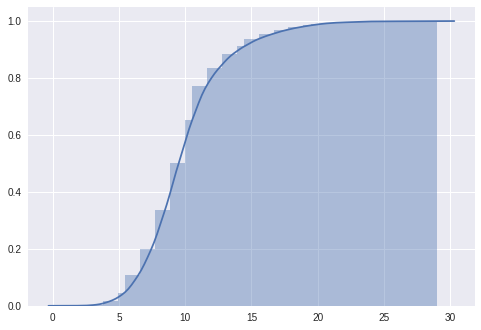

In [18]:
sns.distplot(y, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

In [0]:
from scipy.stats import percentileofscore

def perc_to_value(n):
    if n <= 25.:
        return 0.
    elif n <= 50.:
        return 1.
    elif n <= 75.:
        return 2.
    else:
        return 3.

y_strat = [percentileofscore(y, n) for n in y]
y_strat = [perc_to_value(n) for n in y_strat]

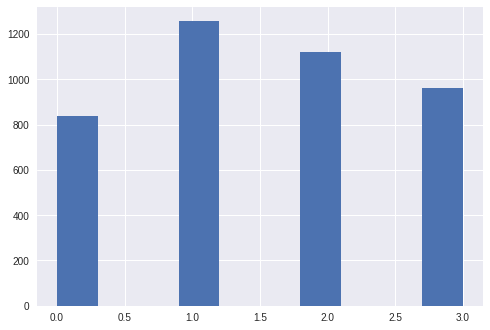

In [27]:
plt.hist(y_strat);

### Split training and test datasets
___

In [0]:
X = df.values.astype(np.float)

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y_strat) # 75% / 25% default

### Train a model
___

In [30]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Make target predictions
___

In [0]:
pred_train_y = model.predict(train_X)
pred_test_y = model.predict(test_X)

### Evaluate the results
___

In [0]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

#### Training results
* Demonstrates overfitting

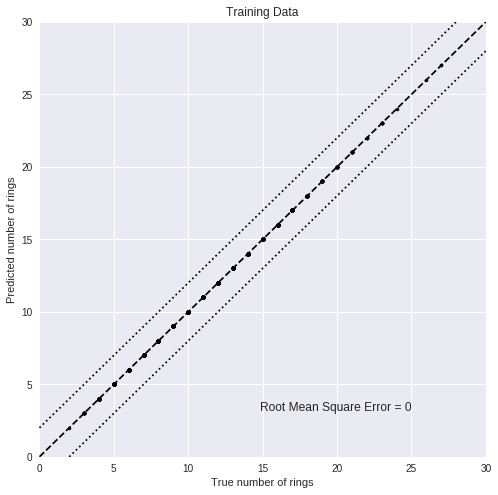

In [33]:
scatter_y(train_y, pred_train_y)
plt.title("Training Data");

#### Test results

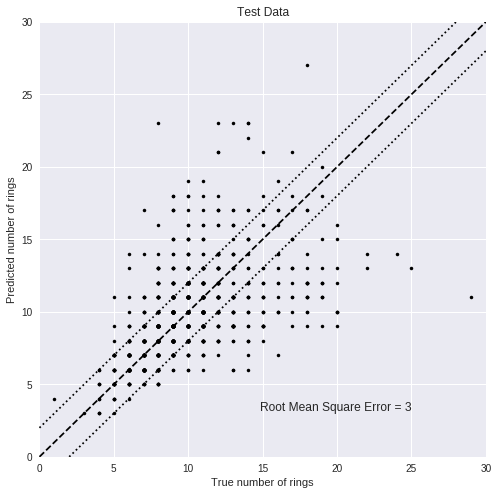

In [34]:
scatter_y(test_y, pred_test_y)
plt.title("Test Data");

### Improve the model
___

In [35]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Make new target predictions
___

In [0]:
pred_train_y = model.predict(train_X)
pred_test_y = model.predict(test_X) 

### Evaluate the new results
___

#### Training results
* Demonstrates much less overfitting

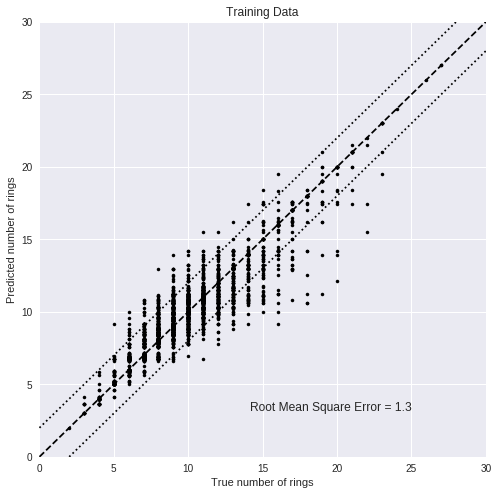

In [37]:
scatter_y(train_y, pred_train_y)
plt.title("Training Data");

#### Test results

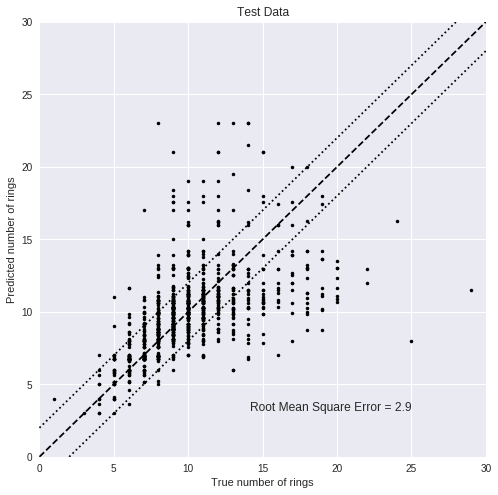

In [38]:
rms_decision_tree = scatter_y(test_y, pred_test_y)
plt.title("Test Data");

### Plot learning curves
___

In [0]:
percentages = np.linspace(10, 100, 10)

In [0]:
train_error = []
test_error = []
for p in percentages:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(p / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())

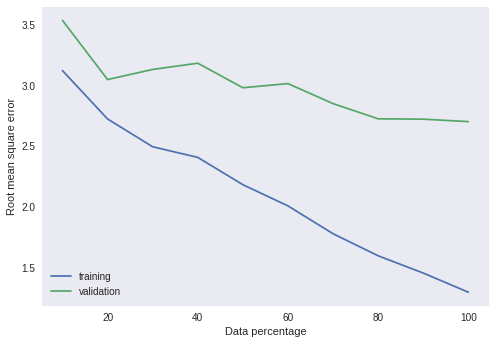

In [41]:
plt.plot(percentages, train_error, label='training')
plt.plot(percentages, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');

Inspecting the learning curve, we see that the training error decreases as the `DecisionTree` fits better the data, but the validation error shows a significant gap compared to training error. That typically means the model is not fitting the data well.

### Build a better model
___

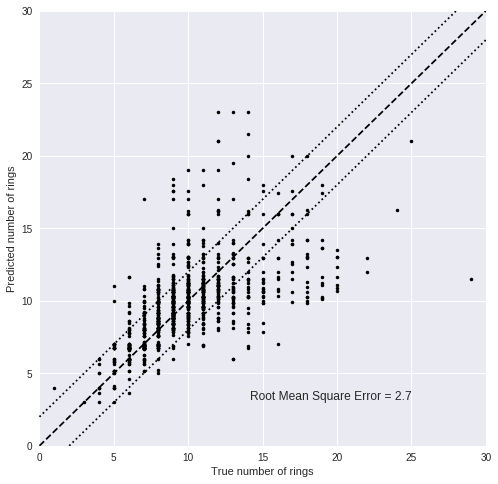

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=5)
model.fit(train_X, train_y)

pred_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)

In [43]:
print("Root Mean Square error went from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error went from 2.9 to 2.7.


### Optimize model parameters
___

In [0]:
model = RandomForestRegressor(n_estimators=100)

In [0]:
n_features = X.shape[1]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(
    model,
    n_iter=20,
    param_distributions=dict(
        max_depth=np.arange(5,20+1), 
        max_features=np.arange(1, n_features+1)
    )
)

grid.fit(X, y)
grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 7, 'max_features': 6}

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


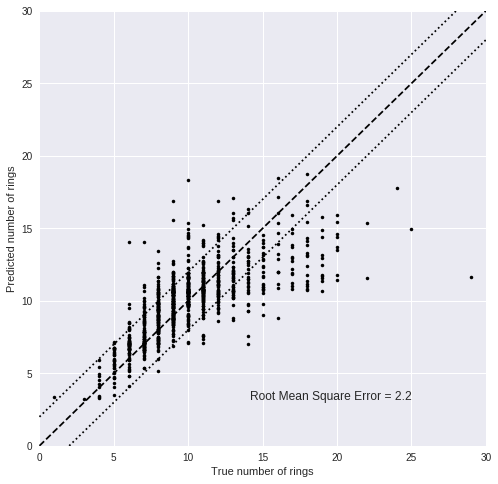

In [47]:
model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_optimized_random_forest = scatter_y(test_y, predicted_test_y)

In [48]:
print("Root Mean Square error went from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))

Root Mean Square error went from 2.7 to 2.2.
